# Creating Histograms for Discrete Probability Distributions
#### Publisher: Ralph Jordan Zapitan
In this content, I will be demonstrating how to create unique discrete probability histograms. 

Normally, when we plot histograms, we only need a set of one-dimensional data(independent variable), without the corresponding dependent variable. For example, we can create some random plot like the following.

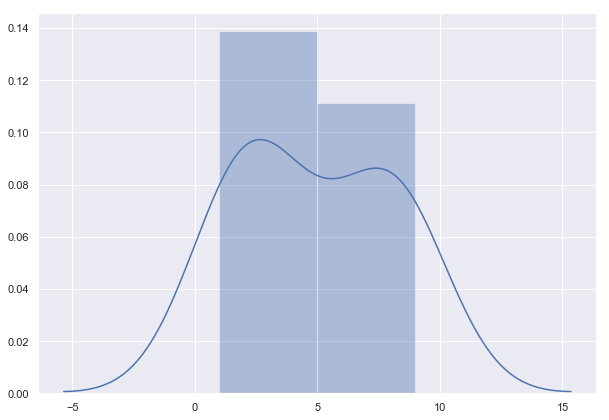

In [23]:
x = [4, 8, 9, 8, 1, 2, 2, 3, 7]
plt.figure(figsize = (10, 7))
sns.distplot(x)
plt.show()

The plot above is the histogram of some data that I randomly thought of. Notice as I stated, we only had the independent variable $ x $ and no dependent variable $ y $. 

Suppose we wanted to plot a histogram of some data under a specific distribution. This means that we need the corresponding dependent variable $ y $ which is contains the probability of each number in $ x $ of occuring. 

The most convenient way of creating functions that plot a desired histogram is by using class methods. Classes are very important in computer science. In the following cell, I'll create a program that does this. Note that in this tutorial, I will only be covering the Poisson, Binomial, and Negative Binomial distribution, since those three are arguably some of the most important and common discrete probability distributions. 

In [1]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [34]:
def Poisson(x, Lambda):
    return np.exp(-1*Lambda)*Lambda**x/math.factorial(x)

def choose(n, k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n - k))

def Binomial(x, n, p):
    return choose(n, x)*(p**x)*(1 - p)**(n - x)

def Negative_Binomial(x, k, p):
    return choose(x - 1, k - 1)*(p*k)*(1 - p)**(x - k)

class plot_distribution:
    def __init__(self, n_points = 20, line_col = 'black', rect_col = 'orange', transparency = 0.1):
        self.x = [i for i in range(n_points)]
        self.n_points = n_points
        self.line_col = line_col
        self.rect_col = rect_col
        self.transparency = transparency
        
    def poisson(self, Lambda = 1):
        y = [Poisson(j, Lambda) for j in self.x]
        k = str(Lambda)
        plt.figure(figsize = (10, 7))
        plt.plot(self.x, y, 'bo')
        for j in self.x:
            xi = [j - 1/2, j - 1/2, j + 1/2, j + 1/2]
            yi = [0, Poisson(j, Lambda), Poisson(j, Lambda), 0]
            plt.plot(xi, yi, color = self.line_col)
            plt.fill_between(xi, yi, color = self.rect_col, alpha = self.transparency)
        plt.xlabel('$ x $')
        plt.ylabel('Poisson($ x $)')
        plt.title('Poisson Distribution at  $ \lambda = $' + k)
        plt.show()
        
    def binomial(self, p = 0.5):
        y = [Binomial(j, self.n_points, p) for j in self.x]
        plt.figure(figsize = (10, 7))
        plt.plot(self.x, y, 'bo')
        for i in self.x:
            xi = [i - 1/2, i - 1/2, i + 1/2, i + 1/2]
            yi = [0, Binomial(i, self.n_points, p), Binomial(i, self.n_points, p), 0]
            plt.plot(xi, yi, color = self.line_col)
            plt.fill_between(xi, yi, color = self.rect_col, alpha = self.transparency)
        plt.xlabel('$ x $')
        plt.ylabel('Binomial($ x $)')
        plt.title('Binomial Distribution with $ n = $' + str(self.n_points) + ' and $ p = $' + str(p))
        plt.show()
        
    def negative_binomial(self, k = 3, p = 0.5):
        x = [i for i in range(k, self.n_points + k)]
        y = [Negative_Binomial(j, k, p) for j in x]
        plt.figure(figsize = (10, 7))
        plt.plot(x, y, 'ko')
        for i in x:
            xi = [i - 1/2, i - 1/2, i + 1/2, i + 1/2]
            yi = [0, Negative_Binomial(i, k, p), Negative_Binomial(i, k, p), 0]
            plt.plot(xi, yi, color = self.line_col)
            plt.fill_between(xi, yi, color = self.rect_col, alpha = self.transparency)
        plt.xlabel('$ x $')
        plt.ylabel('Binomial($ x $)')
        plt.title('Binomial Distribution with $ x = $' + str(self.n_points) + ' and $ p = $' + str(p))
        plt.show()

## Poisson Distribution
The definition of the Poisson Distribution is $$ p(x) = \frac{e^{-\lambda}\lambda^x}{x!}\ \text{for}\ x = 0, 1, 2, ... $$ where $ X $ is a random variable which is the number of outcomes occuring during a given time interval, or a specific region, and $ \lambda $ is average number of outcomes per unit time, distance, area, volume, etc. $ \lambda $ is also equal to the mean and variance of the Poisson Distribution. Therefore, $$ E(X) = Var(X) = \lambda $$

The class "plot_distribution" that I created above has three objects within it: poisson, binomial, and negative_binomial. Note that I've initialized the class parameters to some numbers of my choosing, so that the plot_distribution will return something whether the user passes parameters to the function or not. Therefore, there is no need to worry about getting an error upon calling the function. Suppose we want to create a quick Poisson Distribution histogram. I can create the variable I will call $ x $.

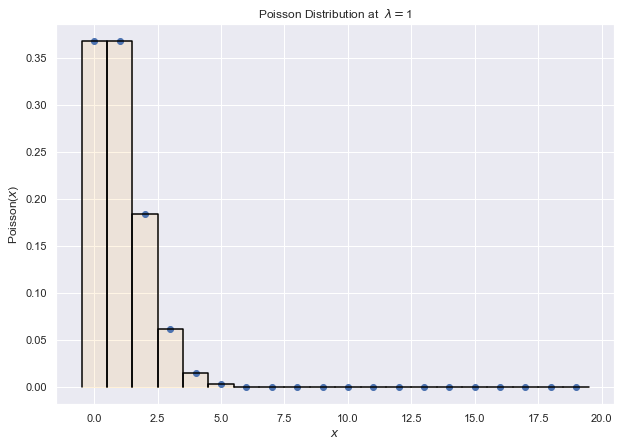

In [24]:
x = plot_distribution()
x.poisson()

Notice that the default value of $ \lambda $ is 1, number of bins is $ 20 $, bar line color is black, and the rectangle color is orange. The transparency parameter ranges between $ 0 $ and $ 1 $, and if affects the background by making the color of each bin more transparent so we can see what is behind it. The closer we get to $ 0 $, the more we will be able to see the gray background, and the more we get closer to $ 1 $, the more solid the color of the bins will become. Suppose we are asked to perform the following task:

Create a Poisson histogram with 25 bins, and $ \lambda = 4 $. Also, change the color of the bins to whatever you like.

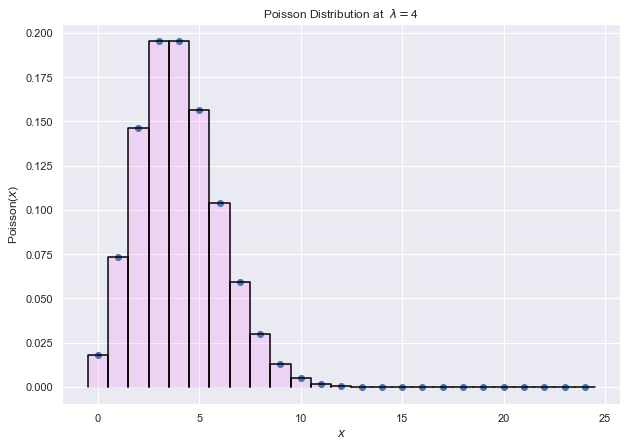

In [25]:
x = plot_distribution(n_points = 25, rect_col = 'magenta')
x.poisson(4)

The nature of the Poisson Distribution is that, for small values of $ \lambda $, the distribution is skewed to the right, or the mean is greater than the median. As we increase the value of $ \lambda $, the skewness shifts to the other side.

## Binomial Distribution

The definition of the Binomial Distribution is $$ p(x) = {n \choose x} p^x (1 - p)^{n - x}\ \text{where}\ x = 0, 1, 2, ... , n $$ where $ X $ is a random variable representing the number of successes in $ n $ trials, $ p $ is the probability of a success occuring, and $ 1 - p $ is the probability of a failure occuring. Since there are $ x $ successes out of the total $ n $ trials, $ n - x $ is the number of failures out of the $ n $ trials. Last but not least, the mean of $ X $ is $ np $ and its variance is $ npq $. Therefore, $$ E(X) = \mu = np $$ and $$ Var(X) = \sigma^2 = npq = np(1 - p) $$ where $ q = 1 - p $. Let's make a quick plot of a histogram of the Binomial Distribution.

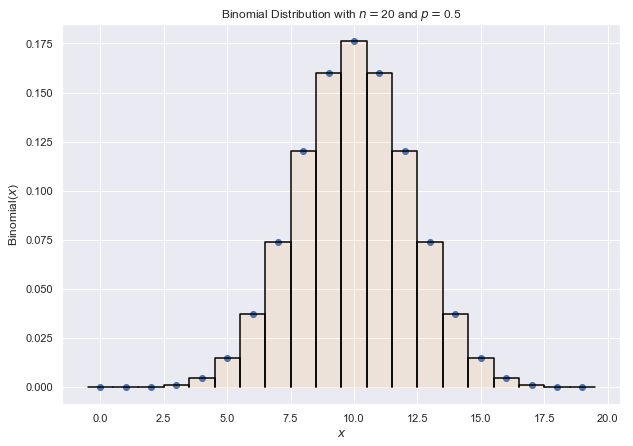

In [26]:
x = plot_distribution()
x.binomial()

Above is the histogram of a Binomially distributed data with $ n = 20 $ trials(bins) and $ p = 0.5 $. These are the default values I've set the parameters to be. Now, suppose we are given the following task:

Plot a histogram of a Binomial Distribution with 30 bins, and $ p = 0.1 $ and $ p = 0.8 $. Set the bin color to whatever you like. Also, compare the histograms with the last one(compare the three).

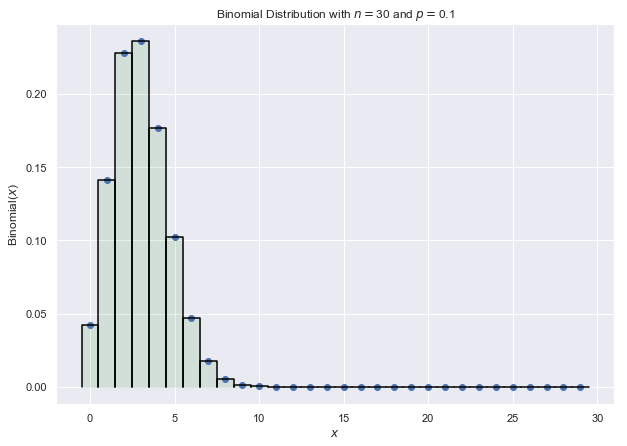

In [31]:
x = plot_distribution(n_points = 30, rect_col = 'green')
x.binomial(0.1)

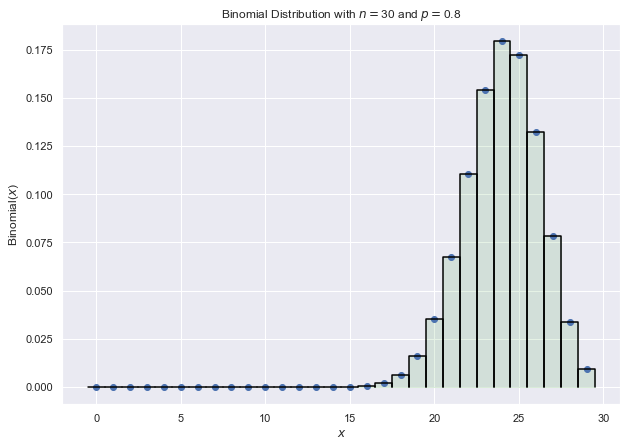

In [32]:
x.binomial(0.8)

For the first histogram where $ p = 0.5 $, the histogram has its peak right at the center of the plot with mean $ \mu = 10 $.

For the second one where $ p = 0.1 $, the distribution is skewed to the right(the mean is greater than the median). 

For the last one where $ p = 0.8 $, it is about the opposite of the second one - the distribution is skewed to the left(the mean is less than the median). 

By looking at the three histograms and comparing them, we can deduce the following:
### 1. For $ 0 \leq p < 0.5 $, the distribution is skewed to the right.
### 2. For $ 0.5 < p \leq 1 $, the distribution is skewed to the left.
### 3. At $ p = 0.5 $, the mean is about equal to the median - the distribution is centered. The "centerness" of the distribution can also be attained by increasing the value of the sample size $ n $.

For the first histogram where $ p = 0.5 $, the shape of the distribution is looking like a bell-shaped plot. When the histogram takes on this bell-shape where the peak is centered at the mean, the distribution is said to follow a Normal Distribution, which is regarded as the most important of all the distributions as most other distributions are related to it by taking the limit of their certain parameters to specific values. In fact, $ 0.5 $ is the best value of $ p $, as it makes the shape symmetrical about the mean. We can easily prove this mathematically. Let $ u $ be the product of the success $ p $ and failure $ 1 - p $. Then, we have the following: $$ u = p(1 - p) $$ The critical number is the value of $ p $ for which the random variable $ X $ becomes approximately normally distributed. I want to find the value of $ p $ for which $ u $ has a maximum value. I can do this by applying the first derivative test, but since $ u $ is a polynomial of degree $ 2 $, taking derivatives is not necessary. I can just rewrite $ u $ in vertex form. Doing this, I get the following: $$ u = p(1 - p) = -\bigg(p - \frac{1}{2}\bigg)^2 + \frac{1}{4} $$ As we can see, $ u $ has a maximum value of $ \frac{1}{4} $ at $ p = \frac{1}{2} $.

## Negative Binomial Distribution
The definition of the Negative Binomial Distribution is $$ b(x; k, p) = {x - 1 \choose k - 1}p^k(1 - p)^{x - k} $$ where $ x = k, k + 1, k + 2, ... $. As with the Binomial Distribution, $ p $ is the probability of a success occuring and $ 1 - p $ is the probability of a failure occuring. $ X $ is the random variable representing the number of trial on which the $ k $th success occurs. Another interpretation of the Negative Binomial Distribution is that, $ x $ is the number of trial that it takes to obtain $ k $ successes. 

Unlike the Binomial Distribution where the number of trial $ n $ is fixed, for the Negative Binomial, the number of trials is a variable. That is, the user, or the statistician, for example, can vary the number of trial as many times as he wants to get the desired number of successes $ k $.

Let's make a quick plot of the Negative Binomial Distribution.

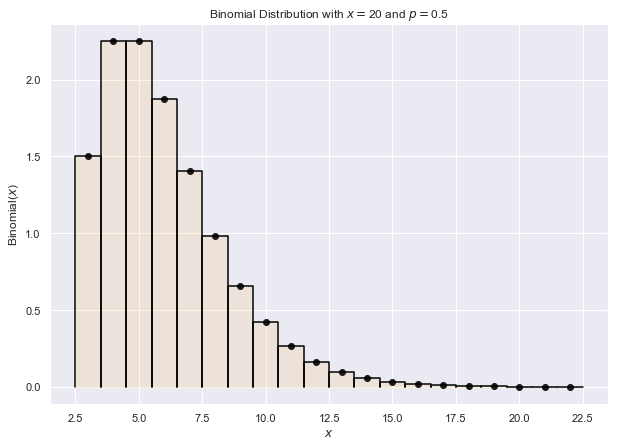

In [35]:
x = plot_distribution()
x.negative_binomial()

Above is a histogram of a Negative Binomially distributed data with $ x = 20 $ and $ p = 0.5 $. Suppose we are given the following task:

Plot a histogram of a Negative Binomially distributed data with 40 bins, $ k = 8 $, and $ p = 0.9 $. Change the color of the bins to whatever you like.

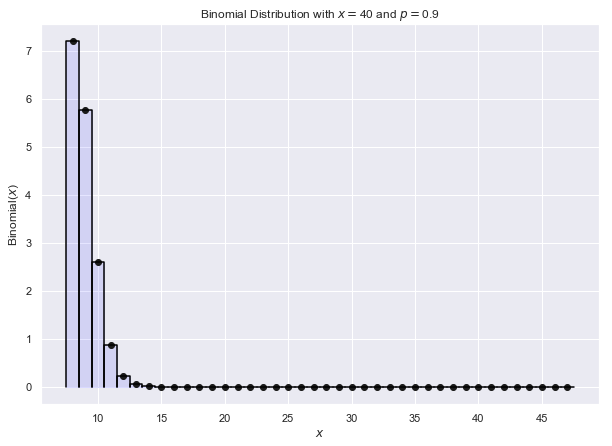

In [38]:
x = plot_distribution(n_points = 40, rect_col = 'blue')
x.negative_binomial(k = 8, p = 0.9)

It is easy to see that for the Negative Binomial distribution, as the number of trials $ x $ gets larger while $ k $ is held fixed, the mean of data becomes much larger than the median. 

This is it for Discrete Probability Distribution Histograms. Note that I can add as many distribution within the plot_distribution class as I want. Feel free to use my code if it helps you with your homework.